In [83]:
import cv2
import sys
from csv import writer
from time import time

delay = 1
window_name = "frame"
csvfile = "test.csv"
y1 = 150
y2 = 400
###ビデオキャプチャ###
cap = cv2.VideoCapture("IMG_4001.mov") 

if not cap.isOpened():
    sys.exit()

###csv用意###
xyr = []

for i in range(10):
    lis = [f"x{i+1}",f"y{i+1}",f"r{i+1}"]
    xyr.extend(lis)

columns_name = ["time"]
columns_name.extend(xyr)
print(columns_name)

with open(csvfile,"a",newline='') as f:
            writer_object = writer(f)
            writer_object.writerow(columns_name)
            f.close()

with open("test2.csv","a",newline='') as f:
            writer_object = writer(f)
            writer_object.writerow(["time","x","y","r"])
            f.close()

###動画再生しながらデータの保存###
st = time()
while True:
    ret, frame = cap.read()                                         # フレームを取得

    second = time()-st

    if ret:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        circle = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp = 1, minDist=20,param1 = 100, param2 = 60,minRadius=0,maxRadius=0)
        if circle is not None:
            for i in circle:
                for j in range(len(i)):
                    x,y,r = i[j]
                    frame = cv2.circle(frame, (int(x), int(y)), int(r), (255, 0, 0), 3)
        #y1 の範囲を指定
        frame = cv2.line(frame,pt1=(0, y1),pt2=(1440, y1),color=(0, 255, 0))
        frame = cv2.putText(frame,
            text=f'{y1}',
            org=(0, y1),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
        #y2の範囲を指定
        frame = cv2.line(frame,pt1=(0, y2),pt2=(1440, y2),color=(255, 0, 0))
        frame = cv2.putText(frame,
            text=f'{y2}',
            org=(0, y2),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=(255, 0,0),
            thickness=2,
            lineType=cv2.LINE_4)
        cv2.imshow(window_name,frame)

        with open(csvfile,"a",newline='') as f:
            writer_object = writer(f)
            writer_object.writerow([second]+i.flatten().tolist())
            f.close()

        with open("test2.csv","a",newline='') as f:
            writer_object = writer(f)
            for k in range(len(i)):
                writer_object.writerow([second]+i[k].flatten().tolist())
            f.close()
    # フレームが取得できない場合はループを抜ける
        if cv2.waitKey(delay) & 0xFF == ord("q"):
            break
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES,0)


 
# 動画オブジェクト解放
cv2.destroyWindow("frame")

['time', 'x1', 'y1', 'r1', 'x2', 'y2', 'r2', 'x3', 'y3', 'r3', 'x4', 'y4', 'r4', 'x5', 'y5', 'r5', 'x6', 'y6', 'r6', 'x7', 'y7', 'r7', 'x8', 'y8', 'r8', 'x9', 'y9', 'r9', 'x10', 'y10', 'r10']


In [50]:
import pandas as pd

df = pd.read_csv("test2.csv")
df

,time,x,y,r
0,0.016040,556.5,218.5,31.600000
1,0.016040,624.5,101.5,26.100000
2,0.079647,542.5,214.5,32.599998
3,0.142549,540.5,211.5,30.799999
4,0.142549,587.5,83.5,27.000000
...,...,...,...,...
1831,43.036481,343.5,549.5,38.500000
1832,43.036481,709.5,287.5,226.600006
1833,43.036481,624.5,102.5,28.200001
1834,43.090631,627.5,107.5,28.799999


In [58]:

circle1 = df[df.y > 400]

Text(0, 0.5, 'y-position (pixels)')

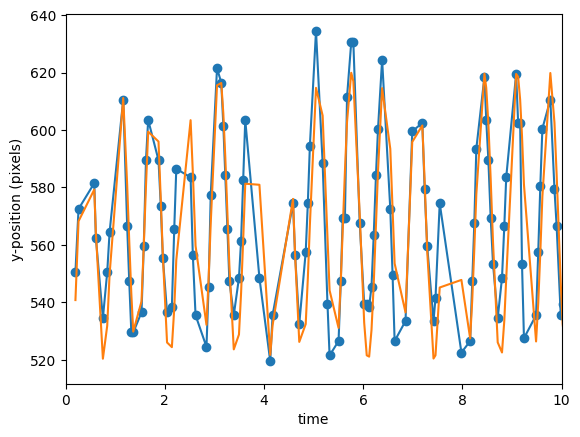

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(circle1.time,circle1.y)
plt.plot(circle1.time,circle1.y)
plt.plot(circle1.time,50*np.sin(np.pi*circle1.time*3+3.8)+570)
plt.xlim(0,10)
plt.xlabel("time")
plt.ylabel("y-position (pixels)")